In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
file_k = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\KENTTAROVA\obs_KENTTAROVA_hourly.csv'
file_l = r'C:\Users\janousu\OneDrive - Oulun yliopisto\CROCUS\MYDATA\OBS\LOMPOLO\obs_LOMPOLO_hourly.csv'

In [14]:
obs_k = pd.read_csv(file_k, sep=';', index_col=0, parse_dates=True)
obs_k = obs_k[['LE', 'LE_flag']]
obs_k.index.name = 'time'

obs_l = pd.read_csv(file_l, sep=';', index_col=0, parse_dates=True)
obs_l = obs_l[['LE', 'LE_flag']]
obs_l.index.name = 'time'

In [15]:
L = 2500000

In [16]:
obs_k['ET'] = -1*obs_k['LE']/L*60*60 # mm H2O per hour 
obs_l['ET'] = -1*obs_l['LE']/L*60*60 # mm H2O per hour 

In [20]:
obs = pd.DataFrame() # both to hourly
obs['ET_NFOR'] = obs_k['ET'].resample('D').sum()
obs['ET_NWET'] = obs_l['ET'].resample('D').sum()
obs['ET_NFOR_flag'] = obs_k['LE_flag'].resample('D').mean()
obs['ET_NWET_flag'] = obs_l['LE_flag'].resample('D').mean()

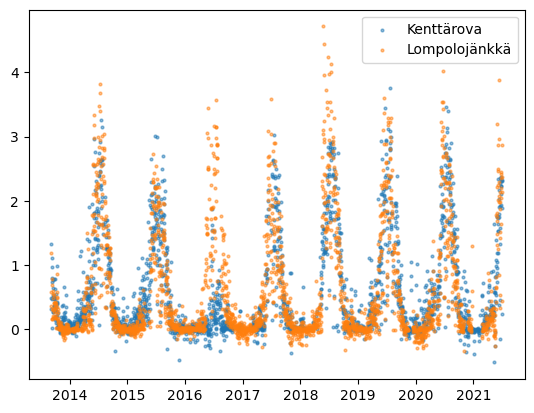

In [29]:
plt.scatter(obs.loc[obs['ET_NFOR_flag'] < 2].index, obs.loc[obs['ET_NFOR_flag'] < 2, 'ET_NFOR'], s=4, alpha=0.5, label='Kenttärova')
plt.scatter(obs.loc[obs['ET_NWET_flag'] < 2].index, obs.loc[obs['ET_NWET_flag'] < 2, 'ET_NWET'], s=4, alpha=0.5, label='Lompolojänkkä')
plt.legend()

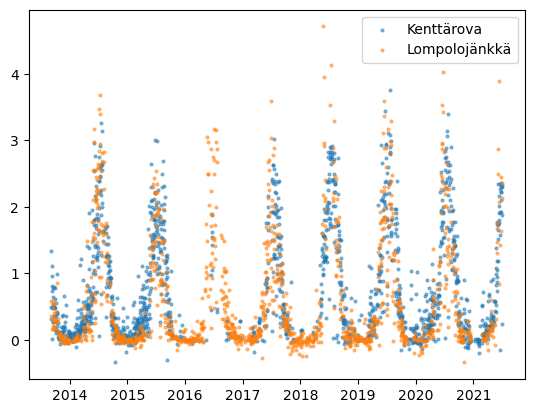

In [30]:
plt.scatter(obs.loc[obs['ET_NFOR_flag'] < 1].index, obs.loc[obs['ET_NFOR_flag'] < 1, 'ET_NFOR'], s=4, alpha=0.5, label='Kenttärova')
plt.scatter(obs.loc[obs['ET_NWET_flag'] < 1].index, obs.loc[obs['ET_NWET_flag'] < 1, 'ET_NWET'], s=4, alpha=0.5, label='Lompolojänkkä')
plt.legend()

In [33]:
obs.to_csv(r'C:\SpaFHy_v1_Pallas_2D\obs\ec_et_new.csv',
               sep=';', index=True)